# About Dataset
* This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains 973 samples of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. Each entry also includes demographic data and experience levels, allowing for comprehensive analysis of fitness patterns, athlete progression, and health trends.

In [81]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error


In [82]:
#importing data
df=pd.read_csv(r"gym_members_exercise_tracking.csv")

In [83]:
#copy orignal dataser
tempdf=df.copy()

In [84]:
tempdf.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [85]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [86]:
tempdf.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [87]:
tempdf

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


# Exploratory Data Analysis

<Axes: xlabel='Age', ylabel='Count'>

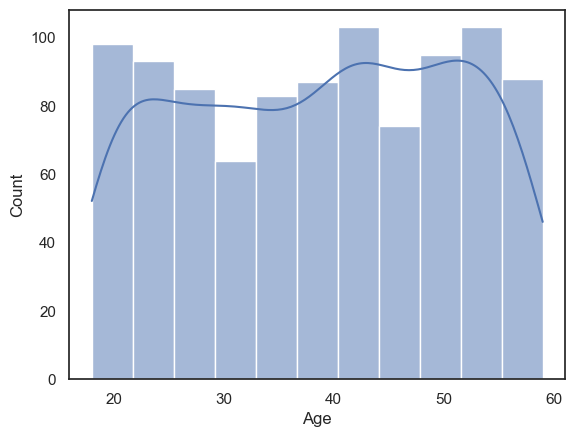

In [88]:
sns.histplot(data=tempdf,x='Age',kde=True)

<Axes: xlabel='Gender', ylabel='Count'>

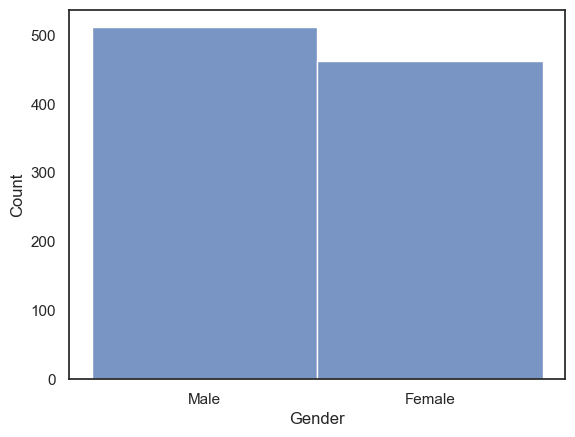

In [89]:
sns.histplot(data=tempdf,x='Gender')

<Axes: xlabel='Gender', ylabel='Weight (kg)'>

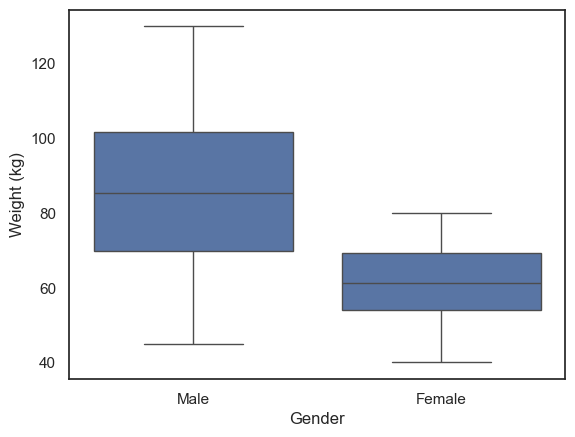

In [90]:
sns.boxplot(data=tempdf,x='Gender',y='Weight (kg)')

<Axes: xlabel='Gender', ylabel='Height (m)'>

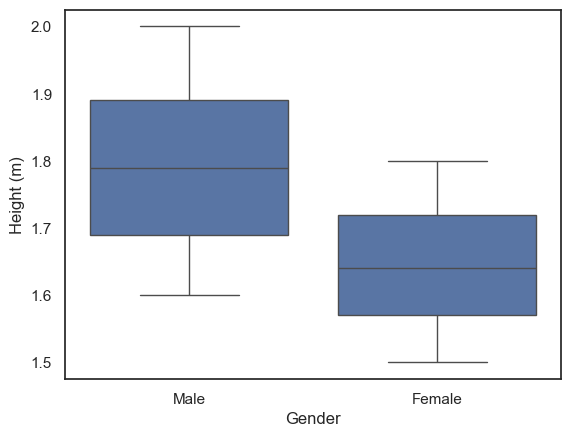

In [91]:
sns.boxplot(data=tempdf,x='Gender',y='Height (m)')

<Axes: xlabel='Weight (kg)', ylabel='Calories_Burned'>

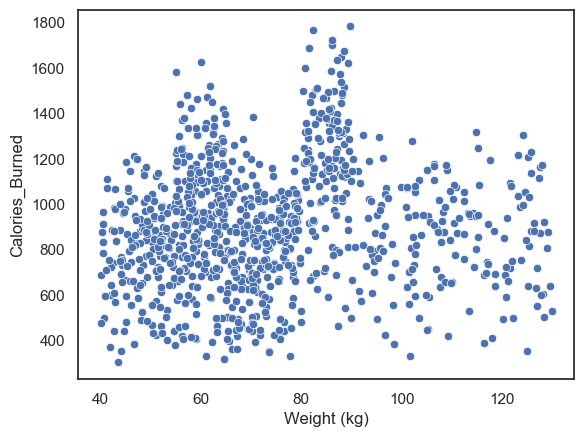

In [92]:
sns.scatterplot(data=tempdf,x='Weight (kg)',y='Calories_Burned')

<Axes: xlabel='Experience_Level', ylabel='count'>

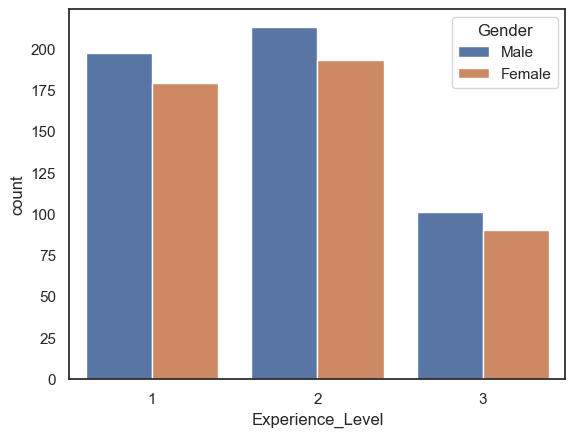

In [93]:
sns.countplot(x=tempdf['Experience_Level'],hue=tempdf['Gender'])

<Axes: xlabel='Workout_Type', ylabel='Calories_Burned'>

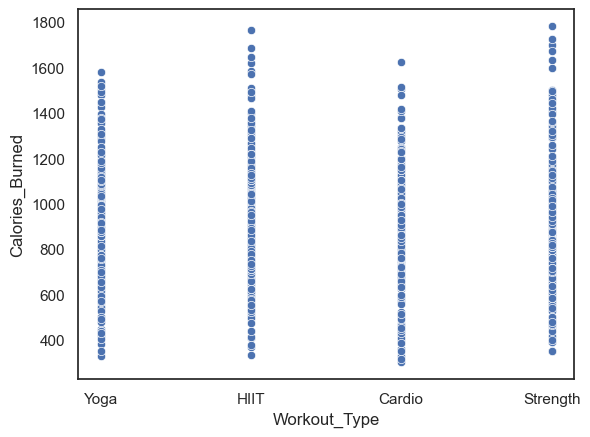

In [94]:
sns.scatterplot(data=tempdf,x='Workout_Type',y='Calories_Burned')

<Axes: xlabel='Session_Duration (hours)', ylabel='Max_BPM'>

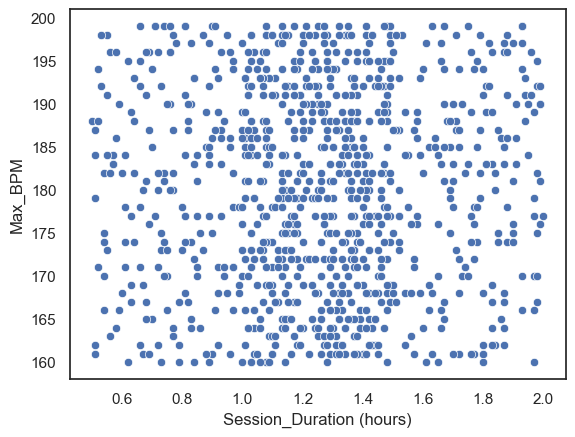

In [95]:
sns.scatterplot(data=tempdf,x='Session_Duration (hours)',y='Max_BPM')

<Axes: xlabel='Workout_Type', ylabel='Fat_Percentage'>

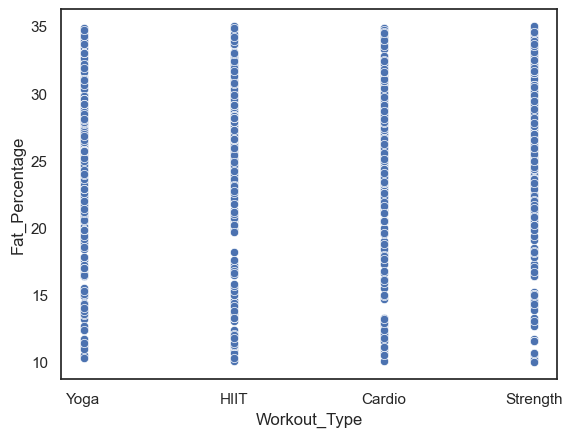

In [96]:
sns.scatterplot(data=tempdf,x='Workout_Type',y='Fat_Percentage')

Text(0.5, 1.0, 'relation between fat_percentage and water intake')

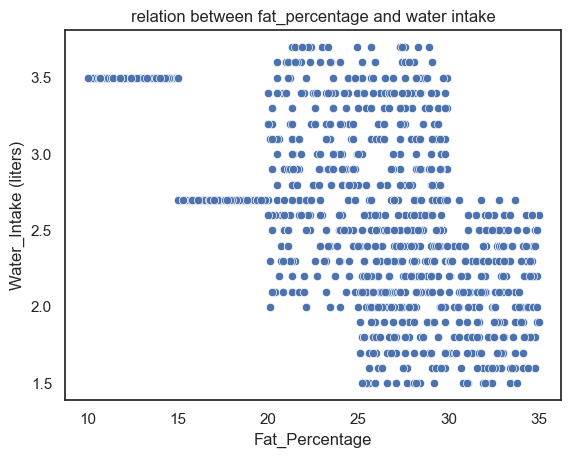

In [97]:
sns.scatterplot(data=tempdf,x='Fat_Percentage',y='Water_Intake (liters)')
plt.title("relation between fat_percentage and water intake")

Text(0.5, 1.0, 'relation between Experience_Level and Calories_Burned')

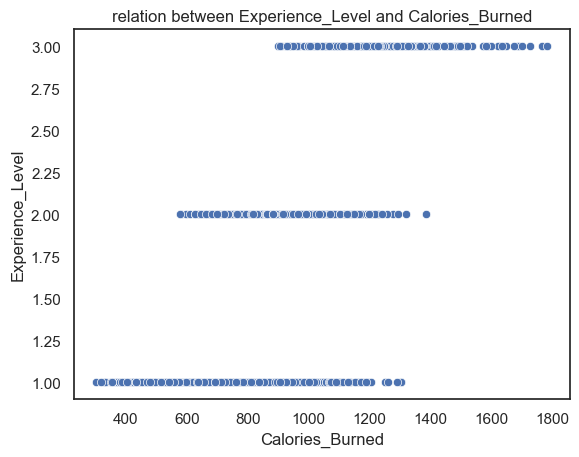

In [98]:
sns.scatterplot(data=tempdf,x='Calories_Burned',y='Experience_Level')
plt.title("relation between Experience_Level and Calories_Burned")

<Axes: xlabel='Calories_Burned', ylabel='Density'>

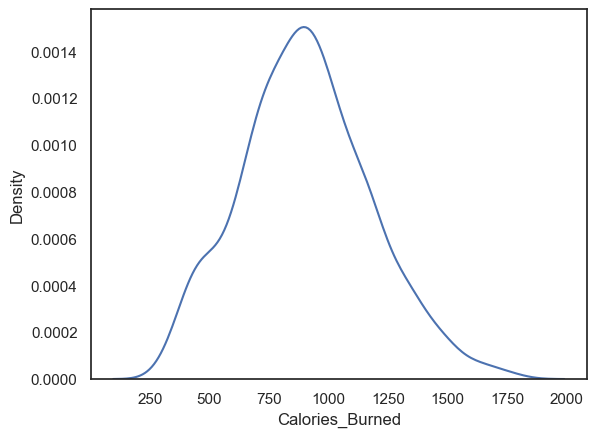

In [99]:
sns.kdeplot(data=tempdf,x='Calories_Burned')

([<matplotlib.patches.Wedge at 0x1b771a60110>,
 [Text(-0.8139646175388919, 0.7399064815196347, 'Strength'),
  Text(-0.6676399106800428, -0.8742179074276302, 'Cardio'),
  Text(0.8901274288840444, -0.6462763807755013, 'Yoga'),
  Text(0.719980700878251, 0.8316416237556071, 'HIIT')],
 [Text(-0.44398070047575916, 0.4035853535561644, '26.5%'),
  Text(-0.364167224007296, -0.47684613132416187, '26.2%'),
  Text(0.48552405211856964, -0.35251438951390973, '24.6%'),
  Text(0.39271674593359135, 0.45362270386669473, '22.7%')])

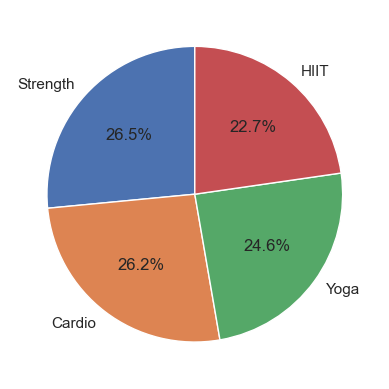

In [100]:
workout_counts = tempdf['Workout_Type'].value_counts()
plt.pie(workout_counts, labels=workout_counts.index, autopct='%1.1f%%', startangle=90)

<Axes: xlabel='Workout_Type', ylabel='count'>

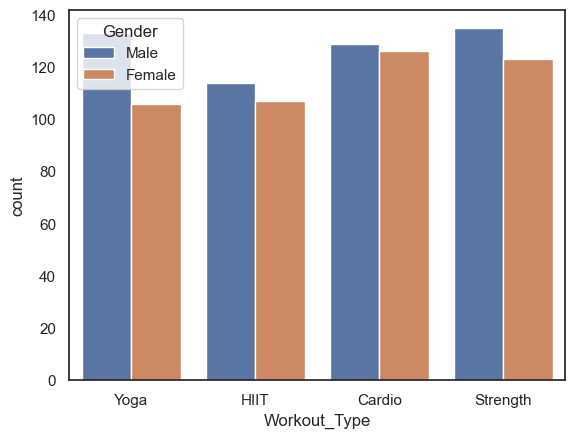

In [101]:
sns.countplot(data=tempdf,x='Workout_Type',hue='Gender')

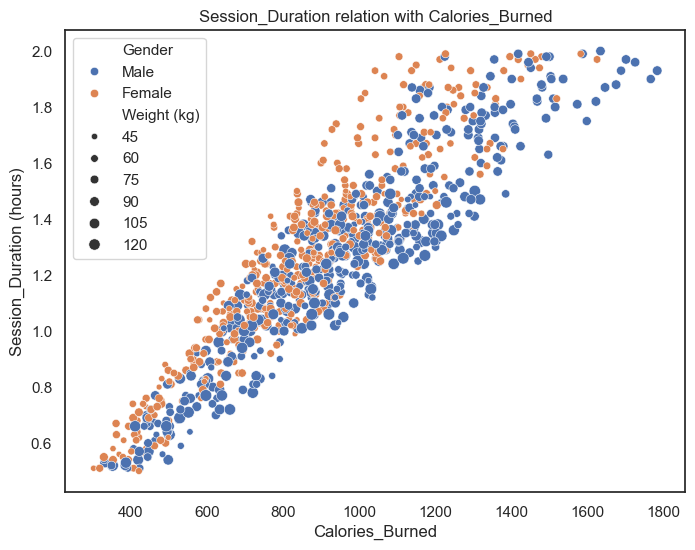

In [102]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=tempdf,x='Calories_Burned',y='Session_Duration (hours)',hue='Gender',size='Weight (kg)')
plt.title("Session_Duration relation with Calories_Burned")
plt.show()

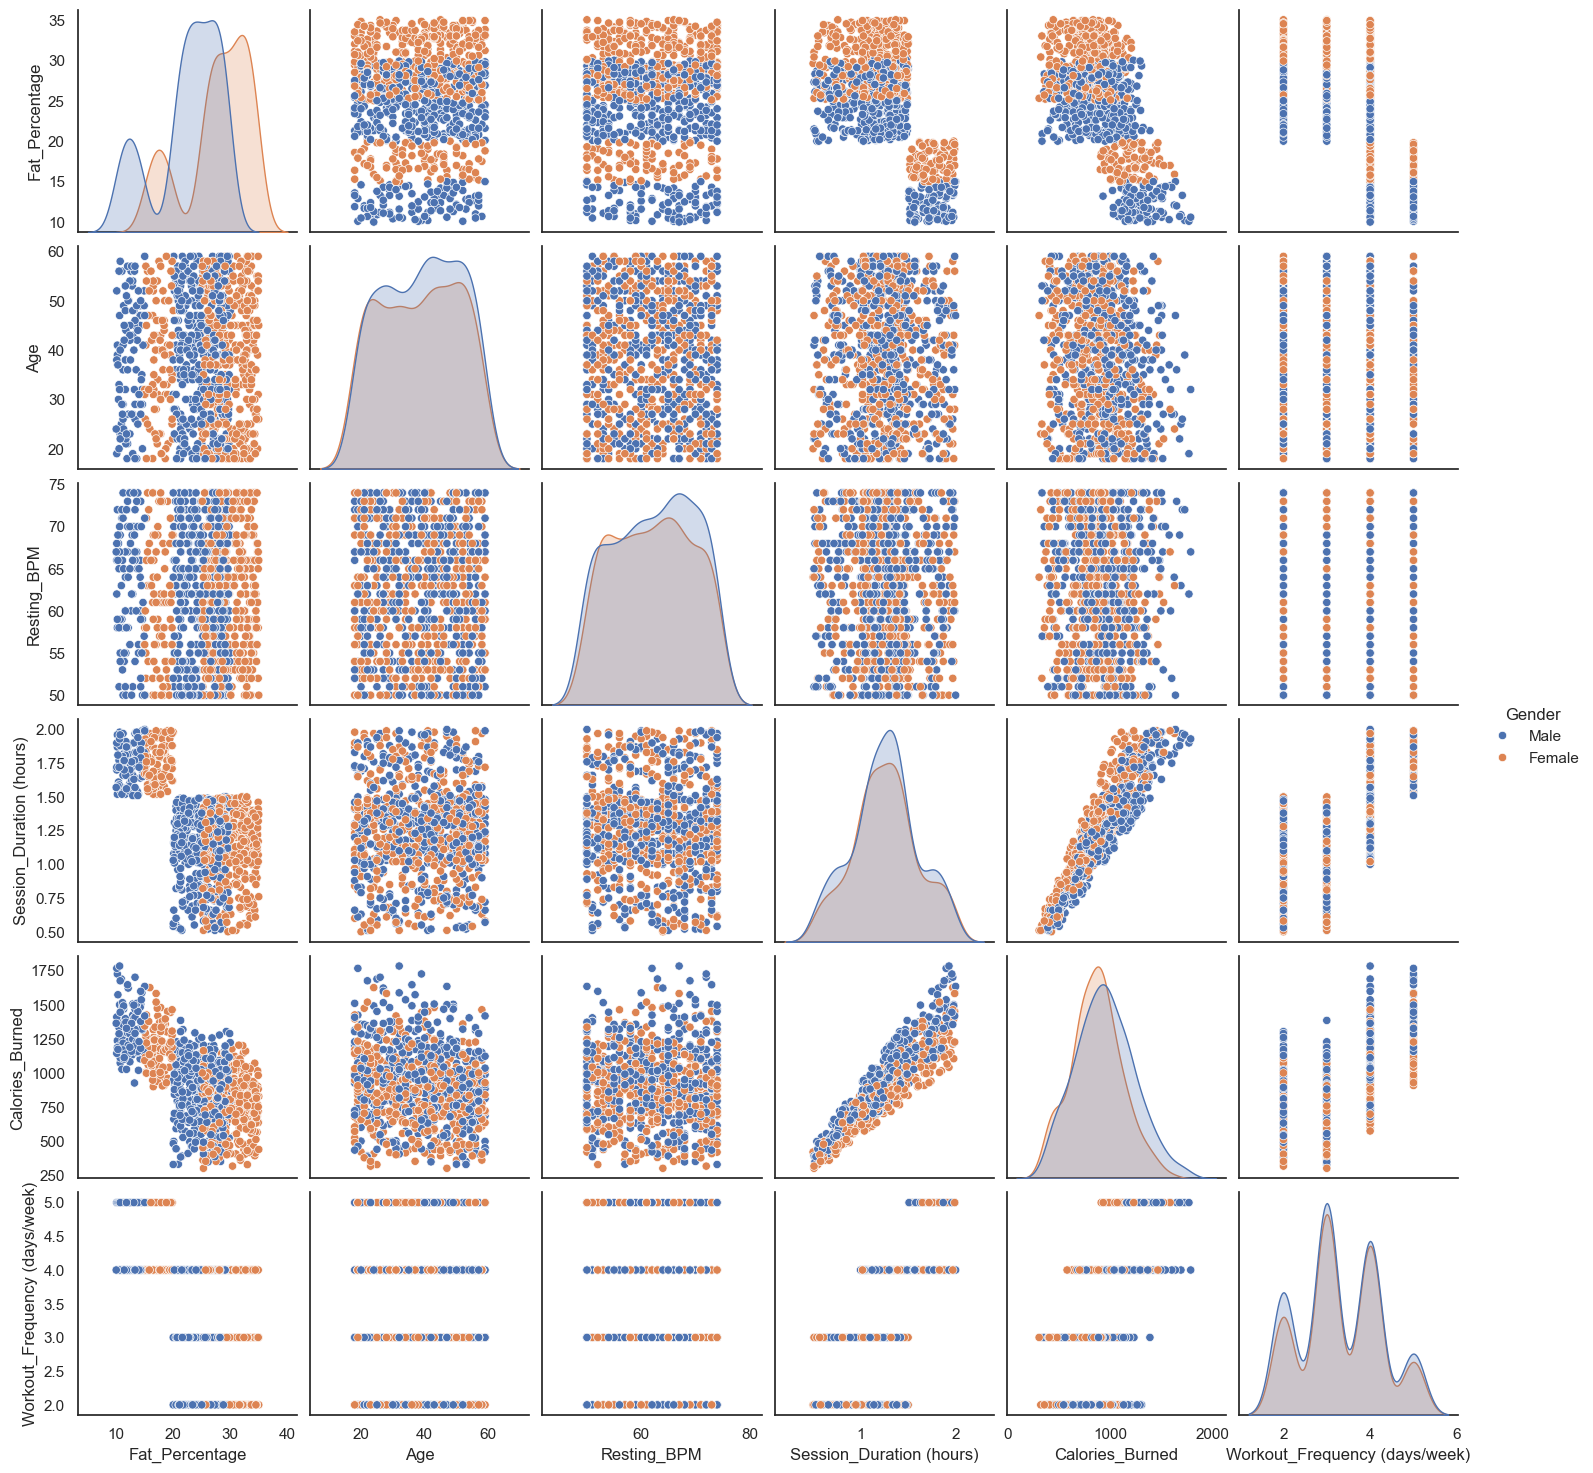

In [103]:
imp_cols=tempdf[['Fat_Percentage','Age','Resting_BPM','Session_Duration (hours)','Calories_Burned','Workout_Frequency (days/week)','Gender']]
sns.pairplot(data=imp_cols,hue='Gender')

In [104]:
tempdf.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


# Data Preprocessing and Model Fitting with Scikit-Learn Pipeline


In [105]:
tempdf.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [106]:
X=tempdf.drop(columns=['Calories_Burned','Max_BPM','Resting_BPM','Water_Intake (liters)'])
y=tempdf['Calories_Burned']

In [107]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [108]:
preprocessor = ColumnTransformer([
    ("ohe_gender", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), ['Gender']),
    ("ohe_workout_type", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), ['Workout_Type']),
    ("scaling_features", MinMaxScaler(), [
        'Age', 'Weight (kg)', 'Height (m)','Avg_BPM',
        'Session_Duration (hours)', 'Fat_Percentage',
        'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'
    ])
], remainder='passthrough')
model = LinearRegression()

In [109]:
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('model', model)
])

In [110]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_gender',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender']),
                                                 ('ohe_workout_type',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Workout_Type']),
                                                 ('scaling_features',
                                                  MinMaxScaler(),
                                                  ['Age', 'Weight (kg)',
                                                   'Height (m)', 'Avg_BPM',
                                                   'Session_Duration (hours)',
                                                   'Fat_Percentage',
                                                   'Workout_Frequency '
                                                   '(days/week)',
                                                   'Experience_Level',
                                                   'BMI'])])),
                ('model', LinearRegression())])

In [111]:
ypred=pipe.predict(X_test)

In [115]:

print("R2 Score:", r2_score(y_test, ypred)*100)
print("MSE:", mean_squared_error(y_test, ypred))
print("MAE:", mean_absolute_error(y_test, ypred))


R2 Score: 97.96306413349538
MSE: 1570.3606805301392
MAE: 30.21164327291274


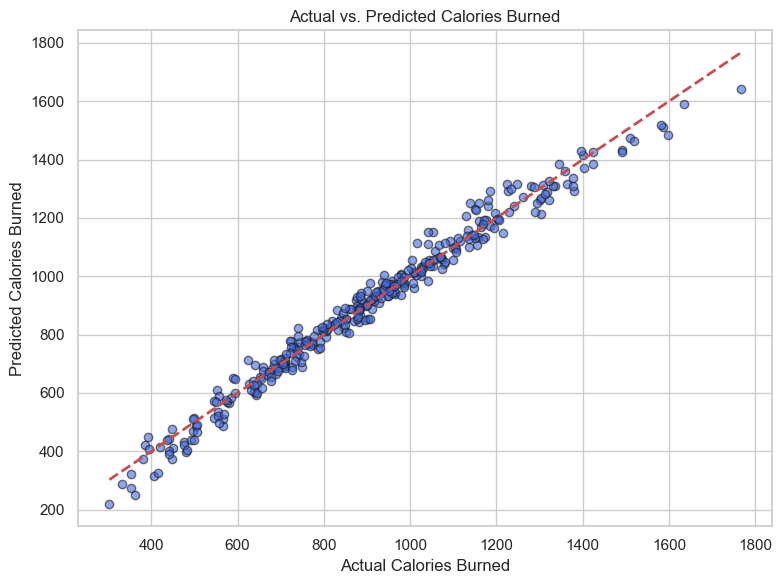

In [113]:


# Set plot style
sns.set(style="whitegrid")

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypred, alpha=0.6, color='royalblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # ideal line
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.title('Actual vs. Predicted Calories Burned')
plt.tight_layout()
plt.show()


## saving trained pipeline using (pickle) for reuse or deployment

In [116]:
import pickle
with open('calorie_burn_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)